# Data Preprocessing and Exploration

In [1]:
#import packages
import os

In [2]:
import pandas as pd
import numpy as np
import time
from CPC18_PF_pred import CPC18_PF_pred
from sklearn.ensemble import RandomForestRegressor

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [4]:
#read in data
Data = pd.read_csv('CPC18_EstSet.csv')
train_data = pd.read_csv('TrainData.csv')
# useful variables
nProblems = Data.shape[0]
PredictedAll = np.zeros(shape=(nProblems, 5))

In [5]:
#data exploration
data = pd.read_csv('TrainData210.csv')
data.head(5)

,GameID,Ha,pHa,La,lot_shape__A,lot_shape_symm_A,lot_shape_L_A,lot_shape_R_A,LotNumA,Hb,...,pBbet_Sign1,pBbet_SignFB,Dom,diffBEV0,diffBEVfb,diffSignEV,BEASTpred,block,Feedback,B_rate
0,1,3,1.0,3,1,0,0,0,1,4,...,-0.2015,-0.2032,0,0.2,0.2,-0.8,0.44503,1,0,0.4224
1,1,3,1.0,3,1,0,0,0,1,4,...,-0.2015,-0.2032,0,0.2,0.2,-0.8,0.48963,2,1,0.5712
2,1,3,1.0,3,1,0,0,0,1,4,...,-0.2015,-0.2032,0,0.2,0.2,-0.8,0.51135,3,1,0.5680
3,1,3,1.0,3,1,0,0,0,1,4,...,-0.2015,-0.2032,0,0.2,0.2,-0.8,0.51613,4,1,0.5952
4,1,3,1.0,3,1,0,0,0,1,4,...,-0.2015,-0.2032,0,0.2,0.2,-0.8,0.52383,5,1,0.6496


In [7]:
data.shape

(1050, 39)

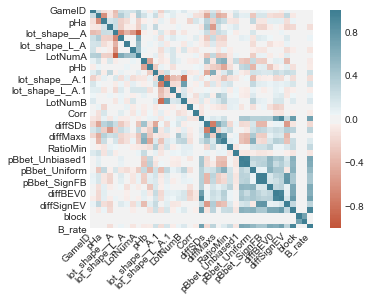

In [9]:
import seaborn as sns
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
#data standardization


# Random Forest

In [125]:
#split train and test set
data_train = data.iloc[:750,]
data_test = data.iloc[750:,]
x_test = data_test.iloc[:, 1:38]
y_test = data_test['B_rate']
x_train = data_train.iloc[:, 1:38]
y_train = data_train['B_rate']

In [91]:
x_train1 = pd.concat([data_train.iloc[:, 1:35],data_train.iloc[:, 36:38]],axis = 1)
y_train1 = data_train['B_rate']
x_test1 = pd.concat([data_test.iloc[:, 1:35],data_test.iloc[:, 36:38]],axis = 1)
y_test1 = data_test['B_rate']

In [90]:
x_train1.shape

(750, 36)

In [93]:
#build a random forest model
rf_model1 = RandomForestRegressor(n_estimators=500, max_features=0.3333, min_samples_leaf=5)

In [97]:
rf_model1.fit(x_train1, y_train1)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=0.3333, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [99]:
#in-sample R^2
rf_model1.score(x_train1,y_train1)

0.9658479222624887

In [100]:
#out-of-sample R^2
rf_model1.score(x_test1, y_test1)

0.842513003653707

In [157]:
#averaging 10 RF models to calculate MSE
n_runs = 10
predictionn = np.repeat([0], 300)
for i in range(n_runs):
    rf_modeln = RandomForestRegressor()
    rf_modeln.fit(X=x_train, y=y_train)
    predn = rf_modeln.predict(x_test)
    predictionn = np.add(predictionn, (1 / n_runs) * pred)
mse = 100*((y_test - predictionn)**2).mean()
mse

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: F

0.8399768806182574

In [134]:
#iterate through the parameter space of estimator numbers and keep a record of the MSEs
n_runs = 50
temp = 0
for i in range(100, 1100, 100):
    prediction = np.repeat([0], 300)
    for j in range(n_runs):
        rf_model = RandomForestRegressor(n_estimators=i, max_features=0.3333, min_samples_leaf=5)
        rf_model.fit(X=x_train, y=y_train)
        pred = rf_model.predict(x_test)
        prediction = np.add(prediction, (1 / n_runs) * pred)
    mse = 100*((y_test - prediction)**2).mean()
    MSE_record[temp, 0] = i
    MSE_record[temp, 1] = mse
    temp += 1
    print('{}: Finish problem number: {}'.format((time.asctime(time.localtime(time.time()))), temp))

Wed Feb  5 17:45:15 2020: Finish problem number: 1
Wed Feb  5 17:45:31 2020: Finish problem number: 2
Wed Feb  5 17:45:56 2020: Finish problem number: 3
Wed Feb  5 17:46:28 2020: Finish problem number: 4
Wed Feb  5 17:47:07 2020: Finish problem number: 5
Wed Feb  5 17:47:54 2020: Finish problem number: 6
Wed Feb  5 17:48:48 2020: Finish problem number: 7
Wed Feb  5 17:49:51 2020: Finish problem number: 8
Wed Feb  5 17:51:00 2020: Finish problem number: 9
Wed Feb  5 17:52:18 2020: Finish problem number: 10


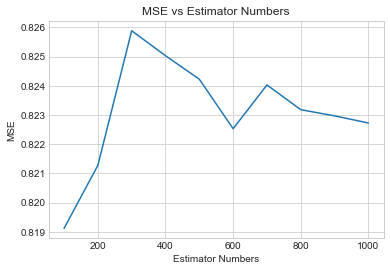

In [135]:
#plot out the curve and find the optimal value
fig = plt.figure()
ax = plt.axes()
plt.plot(MSE_record[:,0],MSE_record[:,1]);
plt.title("MSE vs Estimator Numbers")
plt.xlabel("Estimator Numbers")
plt.ylabel("MSE");

In [139]:
#iterate through the parameter space of maximum features and keep a record of the MSEs
MSE_record1 = np.zeros(shape=(14, 2))
n_runs = 10
temp = 0
for i in np.arange(0.1, 0.8, 0.05):
    prediction = np.repeat([0], 300)
    for j in range(n_runs):
        rf_model1 = RandomForestRegressor(n_estimators=200, max_features=i, min_samples_leaf=5)
        rf_model1.fit(X=x_train1, y=y_train1)
        pred = rf_model1.predict(x_test1)
        prediction = np.add(prediction, (1 / n_runs) * pred)
    mse = 100*((y_test - prediction)**2).mean()
    MSE_record1[temp, 0] = i
    MSE_record1[temp, 1] = mse
    temp += 1

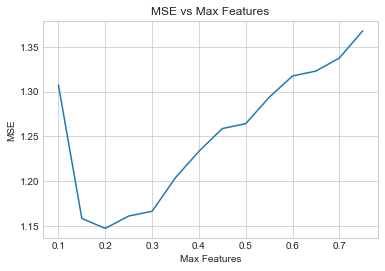

In [155]:
#plot out the curve and find the optimal value
fig = plt.figure()
ax = plt.axes()
plt.plot(MSE_record1[:,0],MSE_record1[:,1]);
plt.title("MSE vs Max Features")
plt.xlabel("Max Features")
plt.ylabel("MSE");

In [152]:
#iterate through the parameter space of minimum leaves and keep a record of the MSEs
MSE_record2 = np.zeros(shape=(17, 2))
n_runs = 50
temp = 0
for i in range(3, 20, 1):
    prediction = np.repeat([0], 300)
    for j in range(n_runs):
        rf_model = RandomForestRegressor(n_estimators=600, max_features=0.3333, min_samples_leaf=i)
        rf_model.fit(X=x_train, y=y_train)
        pred = rf_model.predict(x_test)
        prediction = np.add(prediction, (1 / n_runs) * pred)
    mse = 100*((y_test - prediction)**2).mean()
    MSE_record2[temp, 0] = i
    MSE_record2[temp, 1] = mse
    temp += 1
    print('{}: Finish problem number: {}'.format((time.asctime(time.localtime(time.time()))), temp))

Thu Feb  6 21:38:59 2020: Finish problem number: 1
Thu Feb  6 21:39:57 2020: Finish problem number: 2
Thu Feb  6 21:40:53 2020: Finish problem number: 3
Thu Feb  6 21:41:46 2020: Finish problem number: 4
Thu Feb  6 21:42:38 2020: Finish problem number: 5
Thu Feb  6 21:43:29 2020: Finish problem number: 6
Thu Feb  6 21:44:19 2020: Finish problem number: 7
Thu Feb  6 21:45:09 2020: Finish problem number: 8
Thu Feb  6 21:45:58 2020: Finish problem number: 9
Thu Feb  6 21:46:45 2020: Finish problem number: 10
Thu Feb  6 21:47:31 2020: Finish problem number: 11
Thu Feb  6 21:48:16 2020: Finish problem number: 12
Thu Feb  6 21:49:01 2020: Finish problem number: 13
Thu Feb  6 21:49:48 2020: Finish problem number: 14
Thu Feb  6 21:50:34 2020: Finish problem number: 15
Thu Feb  6 21:51:20 2020: Finish problem number: 16
Thu Feb  6 21:52:05 2020: Finish problem number: 17


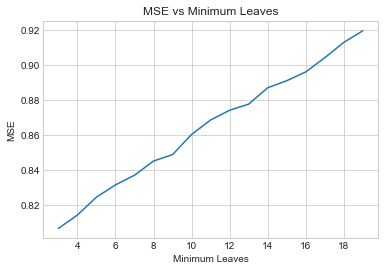

In [156]:
#plot out the curve and find the optimal value
fig = plt.figure()
ax = plt.axes()
plt.plot(MSE_record2[:,0],MSE_record2[:,1]);
plt.title("MSE vs Minimum Leaves")
plt.xlabel("Minimum Leaves")
plt.ylabel("MSE");

In [ ]:
#build the model with optimal hyper parameters
for i in range(n_runs):
    rf_model = RandomForestRegressor(n_estimators=600, max_features=0.3333, min_samples_leaf=3)
    rf_model.fit(X=x_train, y=y_train)
    pred = rf_model.predict(x_test)
    prediction = np.add(prediction, (1 / n_runs) * pred)
mse = 100*((y_test - prediction)**2).mean()

In [72]:
#R^2 of the final model
rf_model.score(x_test, y_test)

0.8924886387849283

In [57]:
#MSE*100 of the final model
mse = 100*((y_test - prediction)**2).mean()
print(mse)

0.8147293812293817
